In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imutils
import cv2

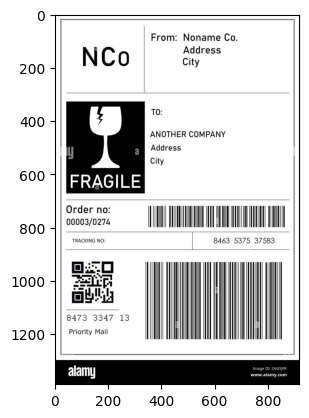

In [2]:
image = cv2.imread("Bill.jpg")
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

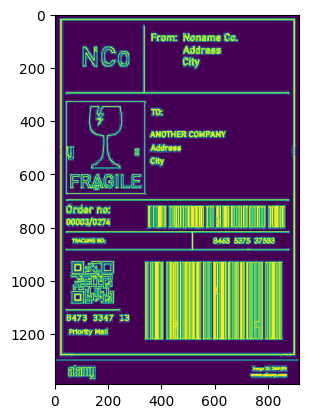

In [5]:
plt.imshow(gradient)

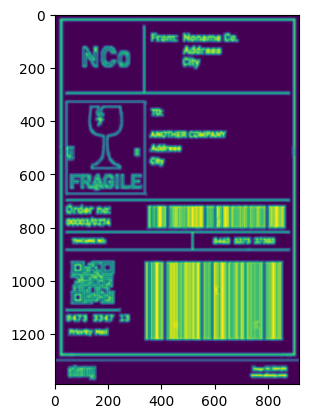

In [6]:
blurred = cv2.blur(gradient, (10, 10))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
plt.imshow(blurred)

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

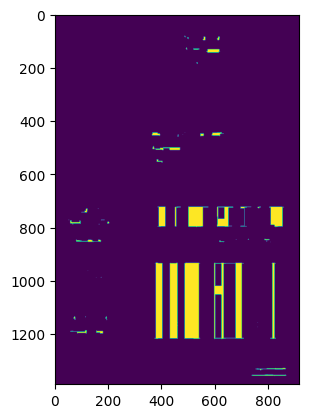

In [8]:
plt.imshow(closed);

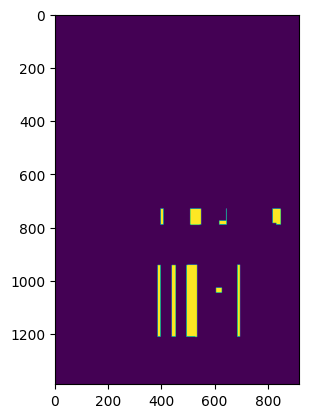

In [9]:
closed = cv2.erode(closed, None, iterations = 7)
plt.imshow(closed)

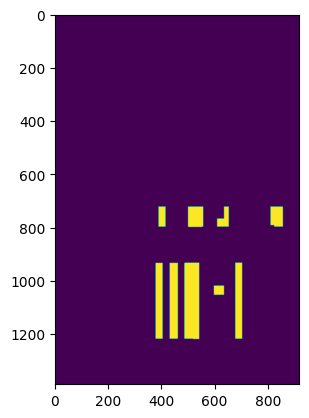

In [10]:
closed = cv2.dilate(closed, None, iterations = 8)
plt.imshow(closed)

In [18]:
codes = []
current = []
current_y =[]
for i in range(closed.shape[0]):
  for j in range(closed.shape[1]):
    if closed[i][j]:
      current.append(i)
      for k in range(closed.shape[1]-1,0,-1):
        if closed[i][k]:
          break
      for l in range(closed.shape[1]):
        if closed[i][l]:
          if (l,k) not in current_y:
            current_y.append((l,k))
          break
      break

In [19]:
def group_continuous_numbers(numbers):
    groups = []
    prev_num = None
    start = None

    for num in sorted(numbers):
        if prev_num is None or num != prev_num + 1:
            if start is not None:
                groups.append((start, prev_num))
            start = num
        prev_num = num

    if start is not None:
        groups.append((start, prev_num))

    return groups

result_y = group_continuous_numbers(current)
print(result_y)

[(723, 799), (934, 1220)]


In [20]:
current_y=[(340,860)]

In [21]:
img2 = image.copy()
line_thickness = 3

for i in result_y:
    x1, y1 = 0, i[0]
    x2, y2 = img2.shape[0], i[0]
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
    x1, y1 = 0, i[1]
    x2, y2 = img2.shape[0], i[1]
    line_thickness = 2
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)

In [22]:
for i in current_y:
    x1, y1 = i[0],0
    x2, y2 = i[0],img2.shape[1]
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
    x1, y1 = i[1],0
    x2, y2 = i[1],img2.shape[1]
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)

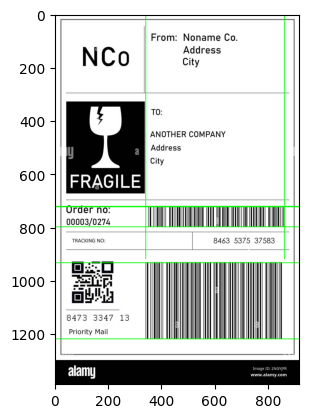

In [23]:
plt.imshow(img2)

In [24]:
start_point = (5, 5)
end_point = (220, 220)
color = (255, 0, 0)
thickness = 2
image_box = image.copy()
for i in result_y:
    start_point = (current_y[0][0], i[0])
    end_point = (current_y[0][1], i[1])
    image_box = cv2.rectangle(image_box, start_point, end_point, color, thickness)

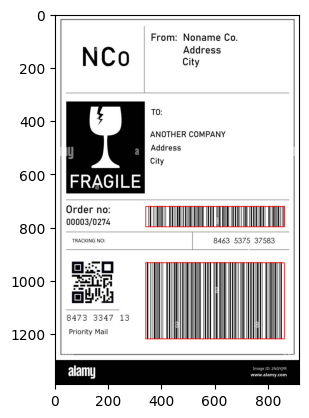

In [25]:
plt.imshow(image_box)